In [1]:
import numpy as np
import pandas as pd
import polars as pl
from pathlib import Path 

from data_utils import load_year_data, read_and_process_file, get_year_files
import logging

In [41]:
# Set logging
logger = logging.getLogger()
logger.setLevel(logging.ERROR)


# Load Data
datafolder = Path("tucu")
year = 2000
df = load_year_data(year, datafolder)

Tamaño de la serie: 10000
Porcentaje de NaNs: 0.080%
8 NaNs y 9992 Valores no nulos.


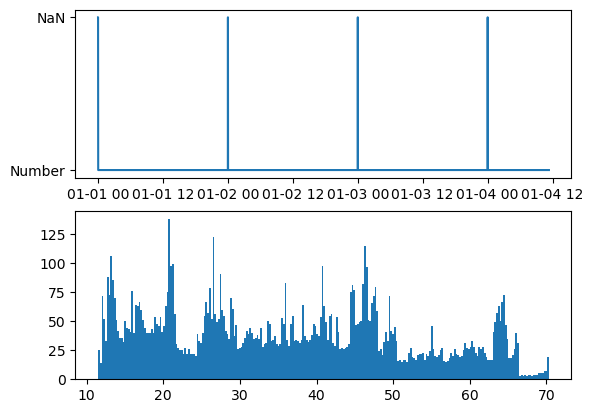

In [45]:
import matplotlib.pyplot as plt
def basic_stats(series : pd.Series):
    n_nan = series.isna().sum()
    nan_ratio = n_nan/series.size
    print(f"Tamaño de la serie: {series.size}")
    print(f"Porcentaje de NaNs: {nan_ratio:.3%}")
    print(f"{n_nan} NaNs y {(series.size - n_nan)} Valores no nulos.")
    

    _, axs = plt.subplots(2)
    axs[0].plot(series.isna().astype(int))
    axs[0].set_yticks([0, 1], ["Number", "NaN"])

    axs[1].hist(series, bins=256)
    

basic_stats(df.TEC.iloc[0:10000])

In [48]:
df[df.DOY == 3]

,seconds,TEC,DOY,year
datetime,,,,
2000-01-03 00:00:00,0,NaN,3,2000.0
2000-01-03 00:00:30,30,NaN,3,2000.0
2000-01-03 00:01:00,60,30.13,3,2000.0
2000-01-03 00:01:30,90,30.06,3,2000.0
2000-01-03 00:02:00,120,29.99,3,2000.0
...,...,...,...,...
2000-01-03 23:57:30,86250,36.78,3,2000.0
2000-01-03 23:58:00,86280,36.78,3,2000.0
2000-01-03 23:58:30,86310,36.77,3,2000.0


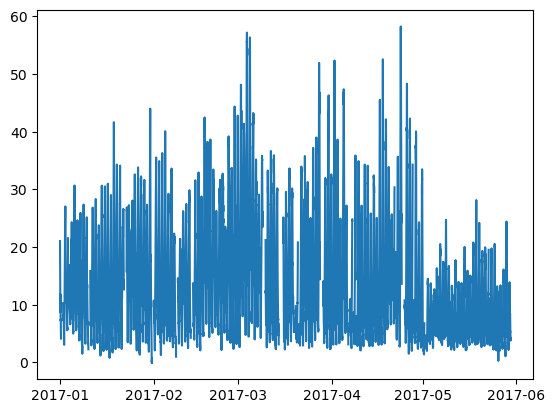

In [11]:
import matplotlib.pyplot as plt 

plt.plot(df.index,df.TEC)


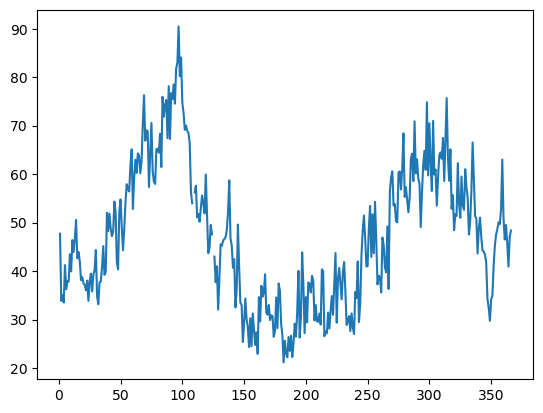

In [4]:
daily_average = df.groupby("DOY").mean()
plt.plot(daily_average.index, daily_average.TEC)